In [1]:
#Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from keras.models import Model
from keras.layers import LSTM, Activation, Dense, Dropout, Input, Embedding
from tensorflow.keras.optimizers import RMSprop
from keras.preprocessing import sequence
from tensorflow.keras.utils import to_categorical
from keras.callbacks import EarlyStopping
from tensorflow.keras.preprocessing.text import Tokenizer

In [2]:
#Loading data
data = pd.read_csv('https://raw.githubusercontent.com/mohitgupta-omg/Kaggle-SMS-Spam-Collection-Dataset-/master/spam.csv', encoding='latin')

In [3]:
#Data glimps
data.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [26]:
#Checking value count of spam and ham
data['v1'].value_counts()

ham     4825
spam     747
Name: v1, dtype: int64

In [5]:
#Splitting data into X & y
X = data['v2']
y = data['v1']

In [6]:
#Label Encoding the target variable
le = LabelEncoder()
y = le.fit_transform(y)
y = y.reshape(-1,1)

In [7]:
#Splitting data into train and test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15)

In [8]:
#Tokenizing the data
max_words = 1000
max_len = 150
tok = Tokenizer(num_words = max_words)
tok.fit_on_texts(X_train)

#Converting tokenized train data into sequence form
sequences = tok.texts_to_sequences(X_train)

#Converting sequence into a matrix form
sequences_matrix = sequence.pad_sequences(sequences, maxlen = max_len)

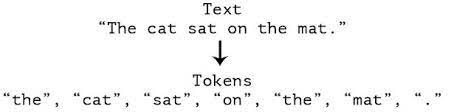

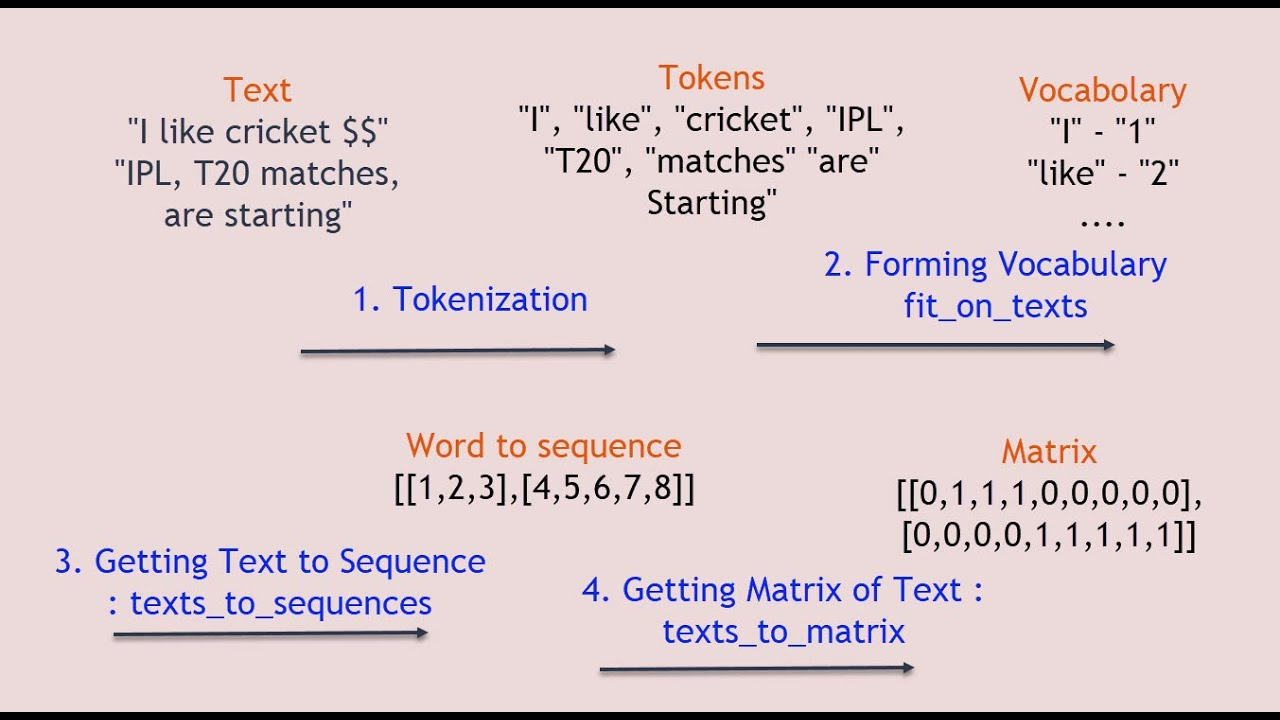

In [9]:
#Creating function using RNN
def RNN():
  inputs = Input(name = 'inputs', shape = [max_len])
  layer = Embedding(max_words, 50, input_length=max_len)(inputs)
  layer = LSTM(64)(layer)

  layer = Dense(256, name = 'FC1')(layer)
  layer = Activation('relu')(layer)
  
  layer = Dropout(0.5)(layer)

  layer = Dense(1, name = 'out_layer')(layer) #Output Layer
  layer = Activation('sigmoid')(layer)
  model = Model(inputs = inputs, outputs = layer)
  return model

In [10]:
#Performing RNN-LSTM
model = RNN()
model.summary()
model.compile(loss = 'binary_crossentropy', 
              optimizer = RMSprop(), 
              metrics = ['accuracy'])

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inputs (InputLayer)         [(None, 150)]             0         
                                                                 
 embedding (Embedding)       (None, 150, 50)           50000     
                                                                 
 lstm (LSTM)                 (None, 64)                29440     
                                                                 
 FC1 (Dense)                 (None, 256)               16640     
                                                                 
 activation (Activation)     (None, 256)               0         
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 out_layer (Dense)           (None, 1)                 257   

In [11]:
#Training the model
model.fit(sequences_matrix,
          y_train,
          batch_size=128,
          epochs=10,
          validation_split=0.2,
          callbacks=[EarlyStopping(monitor='val_loss', min_delta=0.0001)])

Epoch 1/10
30/30 [==============================] - 9s 213ms/step - loss: 0.3230 - accuracy: 0.8746 - val_loss: 0.1283 - val_accuracy: 0.9589
Epoch 2/10
30/30 [==============================] - 6s 195ms/step - loss: 0.0835 - accuracy: 0.9773 - val_loss: 0.0425 - val_accuracy: 0.9916


In [12]:
#Converting tokenized train data into sequence form
test_sequences = tok.texts_to_sequences(X_test)

#Converting sequence into a matrix form
test_sequences_matrix = sequence.pad_sequences(test_sequences, maxlen=max_len)

In [13]:
#Extracting accuracy in test data set
accuracy = model.evaluate(test_sequences_matrix, y_test)

27/27 [==============================] - 1s 22ms/step - loss: 0.0756 - accuracy: 0.9785


In [29]:
#Checking single text and see whether it is spam or ham
Testing_context = ["You've Won! Winning an unexpected prize sounds great in theory."]
txts = tok.texts_to_sequences(Testing_context)
txts = sequence.pad_sequences(txts, maxlen=max_len)
preds = model.predict(txts)
print(preds*100)

[[9.008848]]


In [32]:
#Checking single text and see whether it is spam or ham
Testing_context = ["07732584351 - Rodger Burns - MSG = We tried to call you re your reply to our sms for a free nokia mobile + free camcorder. Please call now 08000930705 for delivery tomorrow"]
txts = tok.texts_to_sequences(Testing_context)
txts = sequence.pad_sequences(txts, maxlen=max_len)
preds = model.predict(txts)
print(preds*100)

[[98.733734]]


In [36]:
#Checking single text and see whether it is spam or ham
Testing_context = ["Congrats! 1 year special cinema pass for 2 is yours. call 09061209465 now! C Suprman V"]
txts = tok.texts_to_sequences(Testing_context)
txts = sequence.pad_sequences(txts, maxlen=max_len)
preds = model.predict(txts)
print(preds*100)

[[95.83534]]
